## Short demonstration of how to perform Monte Carlo approximation of PI with Python 3.5

## I also show three different approaches (loop, vectorized and recursive) and try to find the quickest. In addition I want to see if it is possible to speed up the code even more using the @jit decorator, which you can get from the numba package

In [1]:
import numpy as np
import random
from numba import jit
import platform

In [2]:
platform.uname()

uname_result(system='Linux', node='gil-Inspiron-7559', release='4.4.0-21-generic', version='#37-Ubuntu SMP Mon Apr 18 18:33:37 UTC 2016', machine='x86_64', processor='x86_64')

In [3]:
def monteCarloPi(iterations):
    count = 0
    for i in range(iterations):
        x = random.uniform(0.,1.)
        y = random.uniform(0.,1.)
        dist = (x**2 + y**2)**.5
        if dist <= 1:
            count+=1
    return count/iterations * 4

In [4]:
monteCarloPi(1000000)

3.140072

In [5]:
@jit
def monteCarloPiJit(iterations):
    count = 0
    for i in range(iterations):
        x = random.uniform(0.,1.)
        y = random.uniform(0.,1.)
        dist = (x**2 + y**2)**.5
        if dist <= 1:
            count+=1
    return count/iterations * 4

In [6]:
def monteCarloPiNp(iterations):
    x = np.random.rand(iterations)
    y = np.random.rand(iterations)
    dist = (x**2 + y**2)**.5
    count = (dist <= 1).sum()
    return count/iterations * 4

In [7]:
@jit
def monteCarloPiNpJit(iterations):
    x = np.random.rand(iterations)
    y = np.random.rand(iterations)
    dist = (x**2 + y**2)**.5
    count = (dist <= 1).sum()
    return count/iterations * 4

### I wasn't able to use @jit with global variables, as it returns an error saying it is not implemented.. Not quite sure why this is the case, I will have to read more on JIT!

In [9]:
def monteCarloPiRecursive(iterations, first=True):
    if first:
        global count
        count = 0
        global iterations_total
        iterations_total = iterations
    if iterations == 0:
        return count/iterations_total*4
    else:
        x = random.uniform(0.,1.)
        y = random.uniform(0.,1.)
        dist = (x**2 + y**2)**.5
        if dist <= 1:
            count+=1
        return monteCarloPiRecursive(iterations-1,first=False)

### Loop

In [10]:
%%timeit -n 1000 -r 10
monteCarloPi(10000)

1000 loops, best of 10: 11.2 ms per loop


In [11]:
%%timeit -n 1000 -r 10
monteCarloPiJit(10000)

1000 loops, best of 10: 323 µs per loop


### Numpy

In [12]:
%%timeit -n 1000 -r 10
monteCarloPiNp(10000)

1000 loops, best of 10: 286 µs per loop


In [13]:
%%timeit -n 1000 -r 10
monteCarloPiNpJit(10000)

1000 loops, best of 10: 172 µs per loop


### Recursive

In [14]:
# need to increase the recursion limit  (default is 1000)
# this is just to have comparable tests and is definitely not recommended 
# also I put it at 15000 just as (big) margin as I had error earlier when I would
# set the limit to something only slightly higher than the number of iterations/recursions
import sys
sys.setrecursionlimit(15000)

In [15]:
%%timeit -n 1000 -r 10
monteCarloPiRecursive(10000)

1000 loops, best of 10: 16.9 ms per loop


### Looks like in this case the recursive algorithm is slower than using a loop and that the numpy implementation is the clear winner
### This is also seems to be one of those occasions where using the @jit decorator improves the performance of code with numpy arrays, but even more interest  is the fact that it improves the performance of the loop by almost two orders of magnitude!

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
pi_values = []
for x in np.logspace(0,8,num=100):
    pi_values.append(monteCarloPiNpJit(x))

In [18]:
import math

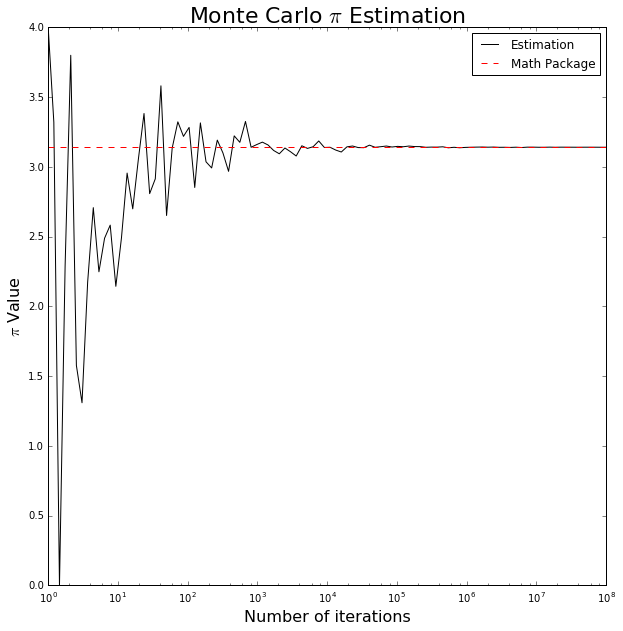

In [20]:
plt.figure(figsize=(10,10))
plt.title('Monte Carlo $\pi$ Estimation', size=22)
plt.semilogx(np.logspace(0,8,num=100),pi_values,c='k',label='Estimation')
plt.axhline(math.pi, linestyle='--',c='r',label='Math Package')
plt.xlabel('Number of iterations', size=16)
plt.ylabel('$\pi$ Value', size=16)
plt.legend()
plt.show()

### Using the fastest code we can quickly then get an estimation of pi over number of iterations and we can see that after some 5000 iterations we should get a pretty reasonable result!